In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
files.upload()

Saving ex1data1.txt to ex1data1.txt


{'ex1data1.txt': b'6.1101,17.592\r\n5.5277,9.1302\r\n8.5186,13.662\r\n7.0032,11.854\r\n5.8598,6.8233\r\n8.3829,11.886\r\n7.4764,4.3483\r\n8.5781,12\r\n6.4862,6.5987\r\n5.0546,3.8166\r\n5.7107,3.2522\r\n14.164,15.505\r\n5.734,3.1551\r\n8.4084,7.2258\r\n5.6407,0.71618\r\n5.3794,3.5129\r\n6.3654,5.3048\r\n5.1301,0.56077\r\n6.4296,3.6518\r\n7.0708,5.3893\r\n6.1891,3.1386\r\n20.27,21.767\r\n5.4901,4.263\r\n6.3261,5.1875\r\n5.5649,3.0825\r\n18.945,22.638\r\n12.828,13.501\r\n10.957,7.0467\r\n13.176,14.692\r\n22.203,24.147\r\n5.2524,-1.22\r\n6.5894,5.9966\r\n9.2482,12.134\r\n5.8918,1.8495\r\n8.2111,6.5426\r\n7.9334,4.5623\r\n8.0959,4.1164\r\n5.6063,3.3928\r\n12.836,10.117\r\n6.3534,5.4974\r\n5.4069,0.55657\r\n6.8825,3.9115\r\n11.708,5.3854\r\n5.7737,2.4406\r\n7.8247,6.7318\r\n7.0931,1.0463\r\n5.0702,5.1337\r\n5.8014,1.844\r\n11.7,8.0043\r\n5.5416,1.0179\r\n7.5402,6.7504\r\n5.3077,1.8396\r\n7.4239,4.2885\r\n7.6031,4.9981\r\n6.3328,1.4233\r\n6.3589,-1.4211\r\n6.2742,2.4756\r\n5.6397,4.6042\r\n9.

In [ ]:
from google.colab import files
files.upload()

Saving ex1data2.txt to ex1data2.txt


{'ex1data2.txt': b'2104,3,399900\r\n1600,3,329900\r\n2400,3,369000\r\n1416,2,232000\r\n3000,4,539900\r\n1985,4,299900\r\n1534,3,314900\r\n1427,3,198999\r\n1380,3,212000\r\n1494,3,242500\r\n1940,4,239999\r\n2000,3,347000\r\n1890,3,329999\r\n4478,5,699900\r\n1268,3,259900\r\n2300,4,449900\r\n1320,2,299900\r\n1236,3,199900\r\n2609,4,499998\r\n3031,4,599000\r\n1767,3,252900\r\n1888,2,255000\r\n1604,3,242900\r\n1962,4,259900\r\n3890,3,573900\r\n1100,3,249900\r\n1458,3,464500\r\n2526,3,469000\r\n2200,3,475000\r\n2637,3,299900\r\n1839,2,349900\r\n1000,1,169900\r\n2040,4,314900\r\n3137,3,579900\r\n1811,4,285900\r\n1437,3,249900\r\n1239,3,229900\r\n2132,4,345000\r\n4215,4,549000\r\n2162,4,287000\r\n1664,2,368500\r\n2238,3,329900\r\n2567,4,314000\r\n1200,3,299000\r\n852,2,179900\r\n1852,4,299900\r\n1203,3,239500\r\n'}

32.072733877455676
[[-3.63029144]
 [ 1.16636235]]
For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


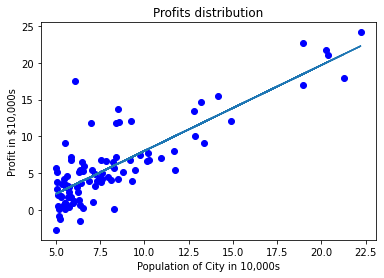

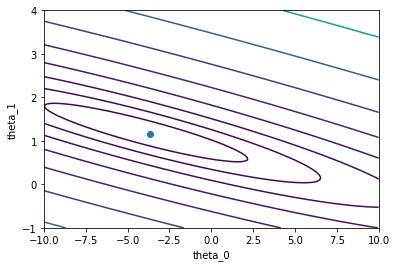

In [ ]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace
from pylab import scatter, show, title, xlabel, ylabel, plot, contour


#Evaluate the linear regression         Y =   -3.63029144  + 1.16636235 * X1
def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size

    predictions = X.dot(theta).flatten() #predictions represent the expected value for when plotting the graph

    sqErrors = (predictions - y) ** 2

    J = (1.0 / (2 * m)) * sqErrors.sum()

    return J


def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta).flatten()

        errors_x1 = (predictions - y) * X[:, 0] #prediction deviation
        errors_x2 = (predictions - y) * X[:, 1]

        theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x1.sum()
        theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x2.sum()

        J_history[i, 0] = compute_cost(X, y, theta) #J_history allows you to remember the values of the cost function for every update.

    return theta, J_history


#Load the dataset
data = loadtxt('ex1data1.txt', delimiter=',')

#Plot the data
scatter(data[:, 0], data[:, 1], marker='o', c='b')
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in $10,000s')
#show()

X = data[:, 0]
y = data[:, 1]


#number of training samples
m = y.size

#Add a column of ones to X (interception data)
it = ones(shape=(m, 2))
it[:, 1] = X

#Initialize theta parameters
theta = zeros(shape=(2, 1))

#Some gradient descent settings
iterations = 1500
alpha = 0.01

#compute and display initial cost
print (compute_cost(it, y, theta))

theta, J_history = gradient_descent(it, y, theta, alpha, iterations)

print (theta)
#Predict values for population sizes of 35,000 and 70,000
predict1 = array([1, 3.5]).dot(theta).flatten()
print ('For population = 35,000, we predict a profit of %f' % (predict1 * 10000))
predict2 = array([1, 7.0]).dot(theta).flatten()
print ('For population = 70,000, we predict a profit of %f' % (predict2 * 10000))

#Plot the results
result = it.dot(theta).flatten()
plot(data[:, 0], result)
show()


#Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100)
theta1_vals = linspace(-1, 4, 100)


#initialize J_vals to a matrix of 0's
J_vals = zeros(shape=(theta0_vals.size, theta1_vals.size))

#Fill out J_vals
for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = zeros(shape=(2, 1))
        thetaT[0][0] = element
        thetaT[1][0] = element2
        J_vals[t1, t2] = compute_cost(it, y, thetaT)

#Contour plot
J_vals = J_vals.T
#Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('theta_0')
ylabel('theta_1')
scatter(theta[0][0], theta[1][0])
show()

[[215810.61679138]
 [ 61446.18781361]
 [ 20070.13313796]] [[6.42977763e+10]
 [6.30310183e+10]
 [6.17906942e+10]
 [6.05762369e+10]
 [5.93870917e+10]
 [5.82227165e+10]
 [5.70825809e+10]
 [5.59661664e+10]
 [5.48729661e+10]
 [5.38024840e+10]
 [5.27542352e+10]
 [5.17277455e+10]
 [5.07225512e+10]
 [4.97381986e+10]
 [4.87742442e+10]
 [4.78302542e+10]
 [4.69058042e+10]
 [4.60004793e+10]
 [4.51138734e+10]
 [4.42455895e+10]
 [4.33952394e+10]
 [4.25624431e+10]
 [4.17468290e+10]
 [4.09480338e+10]
 [4.01657018e+10]
 [3.93994853e+10]
 [3.86490441e+10]
 [3.79140452e+10]
 [3.71941632e+10]
 [3.64890795e+10]
 [3.57984824e+10]
 [3.51220671e+10]
 [3.44595353e+10]
 [3.38105953e+10]
 [3.31749615e+10]
 [3.25523545e+10]
 [3.19425011e+10]
 [3.13451339e+10]
 [3.07599912e+10]
 [3.01868171e+10]
 [2.96253609e+10]
 [2.90753776e+10]
 [2.85366274e+10]
 [2.80088755e+10]
 [2.74918923e+10]
 [2.69854530e+10]
 [2.64893378e+10]
 [2.60033314e+10]
 [2.55272232e+10]
 [2.50608070e+10]
 [2.46038813e+10]
 [2.41562485e+10]
 [2.37

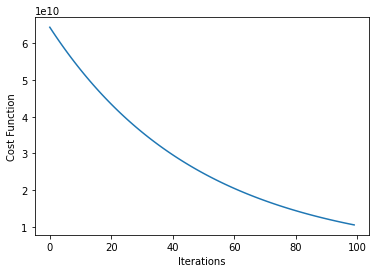

Predicted price of a 1650 sq-ft, 3 br house: 183865.197988


In [ ]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace, mean, std, arange
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import plot, show, xlabel, ylabel

#Evaluate the linear regression       183865.197988

def feature_normalize(X):
    '''
    Returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    '''
    mean_r = []
    std_r = []

    X_norm = X

    n_c = X.shape[1]
    for i in range(n_c):
        m = mean(X[:, i])
        s = std(X[:, i])
        mean_r.append(m)
        std_r.append(s)
        X_norm[:, i] = (X_norm[:, i] - m) / s

    return X_norm, mean_r, std_r


def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size

    predictions = X.dot(theta)

    sqErrors = (predictions - y)

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)

    return J


def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta)

        theta_size = theta.size

        for it in range(theta_size):

            temp = X[:, it]
            temp.shape = (m, 1)

            errors_x1 = (predictions - y) * temp

            theta[it][0] = theta[it][0] - alpha * (1.0 / m) * errors_x1.sum()

        J_history[i, 0] = compute_cost(X, y, theta)

    return theta, J_history

#Load the dataset
data = loadtxt('ex1data2.txt', delimiter=',')


#Plot the data
'''
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
for c, m, zl, zh in [('r', 'o', -50, -25)]:
    xs = data[:, 0]
    ys = data[:, 1]
    zs = data[:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)
ax.set_xlabel('Size of the House')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price of the House')
plt.show()
'''


X = data[:, :2]
y = data[:, 2]


#number of training samples
m = y.size

y.shape = (m, 1)

#Scale features and set them to zero mean
x, mean_r, std_r = feature_normalize(X)

#Add a column of ones to X (interception data)
it = ones(shape=(m, 3))
it[:, 1:3] = x

#Some gradient descent settings
iterations = 100
alpha = 0.01

#Init Theta and Run Gradient Descent
theta = zeros(shape=(3, 1))

theta, J_history = gradient_descent(it, y, theta, alpha, iterations)
print (theta, J_history)
plot(arange(iterations), J_history)
xlabel('Iterations')
ylabel('Cost Function')
show()

#Predict price of a 1650 sq-ft 3 br house
price = array([1.0,   ((1650.0 - mean_r[0]) / std_r[0]), ((3 - mean_r[1]) / std_r[1])]).dot(theta)
print ('Predicted price of a 1650 sq-ft, 3 br house: %f' % (price))